# Edge detection

### Imports

In [1]:
import numpy as np

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import optical_imaging as oi
import oi_file
import cine

ImportError: No module named optical_imaging

### File io

In [2]:
file_directory = '/home/preston/Desktop/Science/Research/cancer_cells/data/10-18-2016/'
file_name = 'hct-116_mcell_20_50_20_pr0025_0001.cine'
file_path = file_directory + file_name

In [3]:
vid = cine.Cine(file_path)

NameError: name 'cine' is not defined

### Determine frame contrast

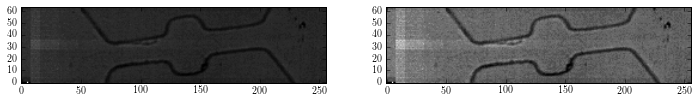

In [11]:
template_frame = vid.get_frame(0)

alpha = 10
beta = 0

fig, axes = plt.subplots(1, 2, figsize = (12,6))
plt.sca(axes[0])
plt.imshow(template_frame, cmap = 'gray', origin = 'lower left')
plt.sca(axes[1])
plt.imshow(oi_file.change_frame_contrast(template_frame, alpha = alpha, beta = beta), cmap = 'gray', origin = 'lower left')
plt.show()

### Look for a frame with cluster in it

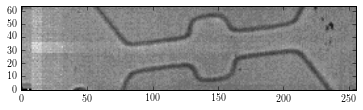

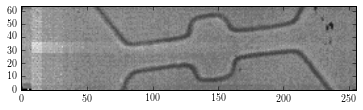

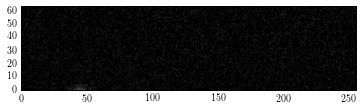

4065


In [14]:
i = 4060
cluster_found = False
template_frame = vid.get_frame(0)
template_frame = oi_file.change_frame_contrast(template_frame, alpha = alpha, beta = beta)
while cluster_found == False:
    
    frame = vid.get_frame(i)
    frame = oi_file.change_frame_contrast(frame, alpha = alpha, beta = beta)
    clusters = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = .1)
    if len(clusters) > 0:
        cluster_found = True
        plt.imshow(frame, cmap = 'gray', origin = 'lower', vmin = 0, vmax = 1)
        plt.show()
        plt.imshow(template_frame, cmap = 'gray', origin = 'lower', vmin = 0, vmax = 1)
        plt.show()
        plt.imshow(abs(frame - template_frame), cmap = 'gray', origin = 'lower left', vmin = 0, vmax = 1)
        plt.show()
        print i
    if i%100 == 0:
        print i
    i = i + 1

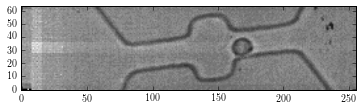

In [15]:
frame = vid.get_frame(i+50)
frame = oi_file.change_frame_contrast(frame, alpha = alpha, beta = beta)
plt.imshow(frame, cmap = 'gray', origin = 'lower')
plt.show()

### Create difference frame

In [16]:
difference_frame = np.array(template_frame - frame, dtype = 'float32')

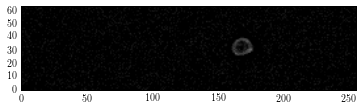

In [17]:
plt.imshow(difference_frame, cmap = 'gray', origin = 'lower', vmin = 0, vmax = 1)
plt.show()

### Threshold the difference frame

In [18]:
ret, threshold_frame = cv2.threshold(difference_frame, 0.1, 1, cv2.THRESH_BINARY)

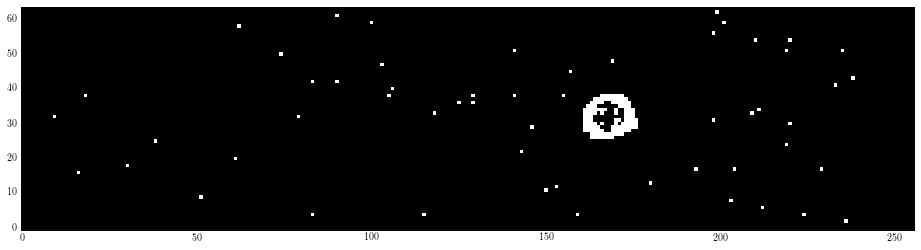

In [19]:
fig = plt.figure(figsize = (16,10))
plt.imshow(threshold_frame, vmin = 0, vmax = 1, cmap = 'gray', origin = 'lower', interpolation = 'None')
plt.show()

In [20]:
for row in threshold_frame:
    print row

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [21]:
threshold_frame = np.array(threshold_frame, dtype = 'uint8')

In [22]:
for row in threshold_frame:
    print row

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [23]:
threshold_frame = threshold_frame*255

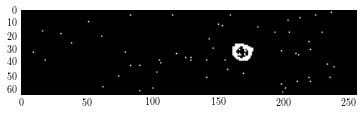

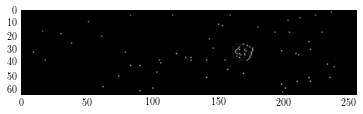

In [24]:
plt.imshow(threshold_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()
contours, hierarchy = cv2.findContours(threshold_frame, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(threshold_frame, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

In [25]:
contour_lengths = np.array([len(cont) for cont in contours])
for i, contour in enumerate(contours):
    print i, len(contour)
cont = contours[35]

0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 21
36 4
37 32
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1


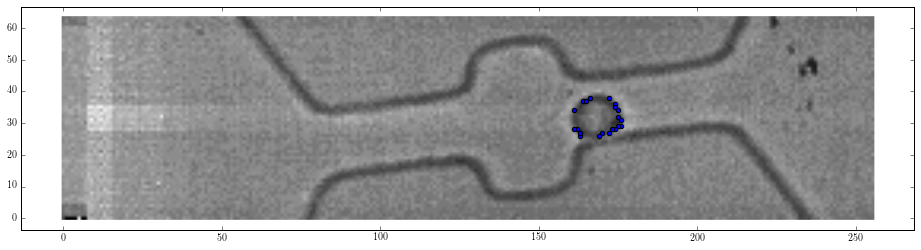

In [26]:
fig = plt.figure(figsize = ((16,8)))
plt.imshow(frame, cmap = 'gray', origin = 'lower', vmin = 0, vmax = 1)
for pix in cont:
    plt.scatter(pix[0][0], pix[0][1])

In [61]:
cont = np.squeeze(cont)

In [62]:
com_x = (np.max(cont[:,0])+np.min(cont[:,0]))/2.
com_y = (np.max(cont[:,1])+np.min(cont[:,1]))/2.
print com_x, com_y

168.5 32.0


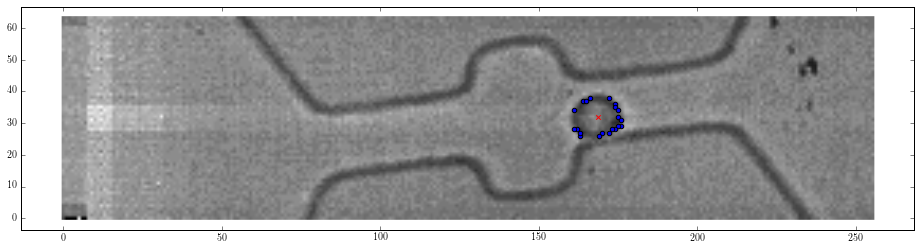

In [64]:
fig = plt.figure(figsize = ((16,8)))
plt.imshow(frame, cmap = 'gray', origin = 'lower', vmin = 0, vmax = 1)
plt.scatter(cont[:,0], cont[:,1])
plt.scatter(com_x, com_y, marker = 'x', color = 'red')
plt.show()

### Get angles

In [78]:
angs = np.array([(np.arctan2(cont[i,1]-com_y, cont[i,0]-com_x)+2*np.pi)%(2*np.pi) for i in range(cont.shape[0])])
cont_vec = cont - np.array((com_x, com_y))

In [79]:
print cont_vec

[[-5.5 -6. ]
 [-5.5 -5. ]
 [-6.5 -4. ]
 [-7.5 -4. ]
 [-7.5  2. ]
 [-4.5  5. ]
 [-3.5  5. ]
 [-2.5  6. ]
 [ 3.5  6. ]
 [ 5.5  4. ]
 [ 5.5  3. ]
 [ 6.5  2. ]
 [ 6.5  0. ]
 [ 7.5 -1. ]
 [ 7.5 -3. ]
 [ 6.5 -3. ]
 [ 5.5 -4. ]
 [ 4.5 -4. ]
 [ 3.5 -5. ]
 [ 1.5 -5. ]
 [ 0.5 -6. ]]


### Sort angles

In [80]:
min_index = np.argmin(angs)
angs = np.roll(angs, -(min_index+1))[::-1]
cont_vec = np.roll(cont_vec, -(min_index+1))[::-1]

print angs
print cont_vec

[ 0.          0.29849893  0.49934672  0.62879629  1.04272188  1.96558745
  2.18152229  2.30361143  2.88099026  3.63154998  3.69324764  3.87940771
  3.97044171  4.79553021  5.00384577  5.32311494  5.55654297  5.65438902
  5.85077753  5.90267893  6.15063377]
[[ 5.  -3.5]
 [ 2.  -4.5]
 [-4.  -7.5]
 [-4.  -7.5]
 [-5.  -6.5]
 [-6.  -5.5]
 [-6.  -5.5]
 [-5.   0.5]
 [-5.   1.5]
 [-4.   3.5]
 [-4.   4.5]
 [-3.   5.5]
 [-3.   6.5]
 [-1.   7.5]
 [ 0.   7.5]
 [ 2.   6.5]
 [ 3.   6.5]
 [ 4.   5.5]
 [ 6.   5.5]
 [ 6.   3.5]
 [ 5.  -2.5]]


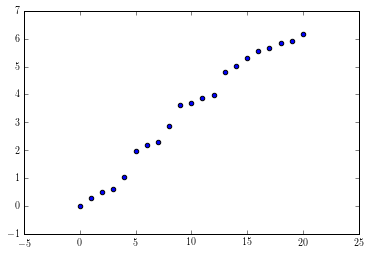

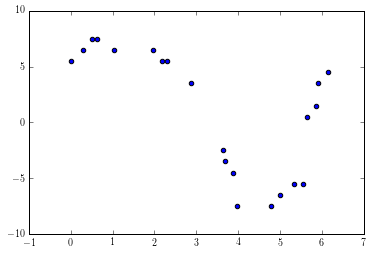

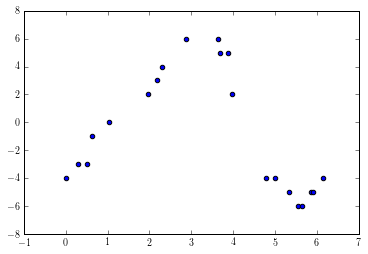

In [76]:
plt.scatter([i for i in range(len(angs))], angs)
plt.show()
plt.scatter(angs, cont_vec[:,0])
plt.show()
plt.scatter(angs, cont_vec[:,1])
plt.show()

In [88]:
print cont

[[163  26]
 [163  27]
 [162  28]
 [161  28]
 [161  34]
 [164  37]
 [165  37]
 [166  38]
 [172  38]
 [174  36]
 [174  35]
 [175  34]
 [175  32]
 [176  31]
 [176  29]
 [175  29]
 [174  28]
 [173  28]
 [172  27]
 [170  27]
 [169  26]]


In [93]:
cov_mat = np.cov(cont.T)
print cov_mat
print
w, v = np.linalg.eig(cov_mat)
print w
print
print v

[[ 30.46190476   0.9452381 ]
 [  0.9452381   18.56190476]]

[ 30.53651886  18.48729066]

[[ 0.99689897 -0.07869205]
 [ 0.07869205  0.99689897]]


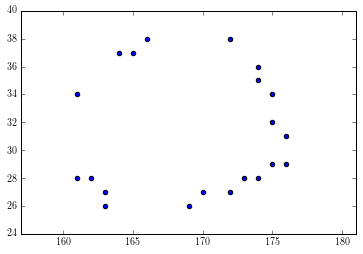

In [108]:

plt.scatter(cont[:,0], cont[:,1])
#plt.xlim(160, 180)
#plt.ylim(24, 44)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

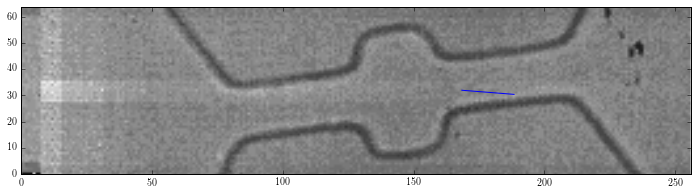

In [103]:
fig = plt.figure(figsize = (12,8))
plt.imshow(template_frame, origin = 'lower', vmin = 0, vmax = 1, cmap = 'gray')
plt.plot([com_x, com_x + 20*v[0,0]], [com_y, com_y+20*v[0,1]])
plt.xlim(0, template_frame.shape[1])
plt.ylim(0, template_frame.shape[0])
plt.show()

In [113]:
angs_interp = interp1d([1.*i/(len(angs)) for i in range(len(angs))], angs, kind = 'quadratic')

In [115]:
plt.plot(, [angs_interp(i/100.) for i in range(100)])
plt.show()

ValueError: A value in x_new is above the interpolation range.